In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data.csv', encoding="utf-8")  
df

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
0,3.000000e+09,ولنجک,270,1399,2.000000e+09,30000000.0,1,1,1
1,3.333333e+08,کوی فردوس,70,1387,2.000000e+08,4000000.0,0,1,1
2,6.333333e+08,پونک,120,1395,3.500000e+08,8500000.0,1,1,1
3,5.333333e+08,هروی,110,1395,2.000000e+08,10000000.0,1,1,1
4,4.000000e+08,پونک,80,1387,2.000000e+08,6000000.0,1,1,1
...,...,...,...,...,...,...,...,...,...
18083,8.000000e+08,پاسداران,100,1399,8.000000e+08,0.0,1,1,1
18084,3.000000e+08,نارمک,90,1398,1.000000e+08,6000000.0,1,1,1
18085,1.516667e+09,کامرانیه,165,1390,3.500000e+08,35000000.0,1,1,1
18086,4.000000e+09,دروس,300,1399,4.000000e+09,0.0,1,1,1


## Content

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18088 entries, 0 to 18087
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_value   18088 non-null  float64
 1   neighborhood  18088 non-null  object 
 2   area          18088 non-null  int64  
 3   year          18088 non-null  int64  
 4   deposit       18088 non-null  float64
 5   rent          18088 non-null  float64
 6   elavator      18088 non-null  int64  
 7   parking       18088 non-null  int64  
 8   warehouse     18088 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

total_value     0
neighborhood    0
area            0
year            0
deposit         0
rent            0
elavator        0
parking         0
warehouse       0
dtype: int64

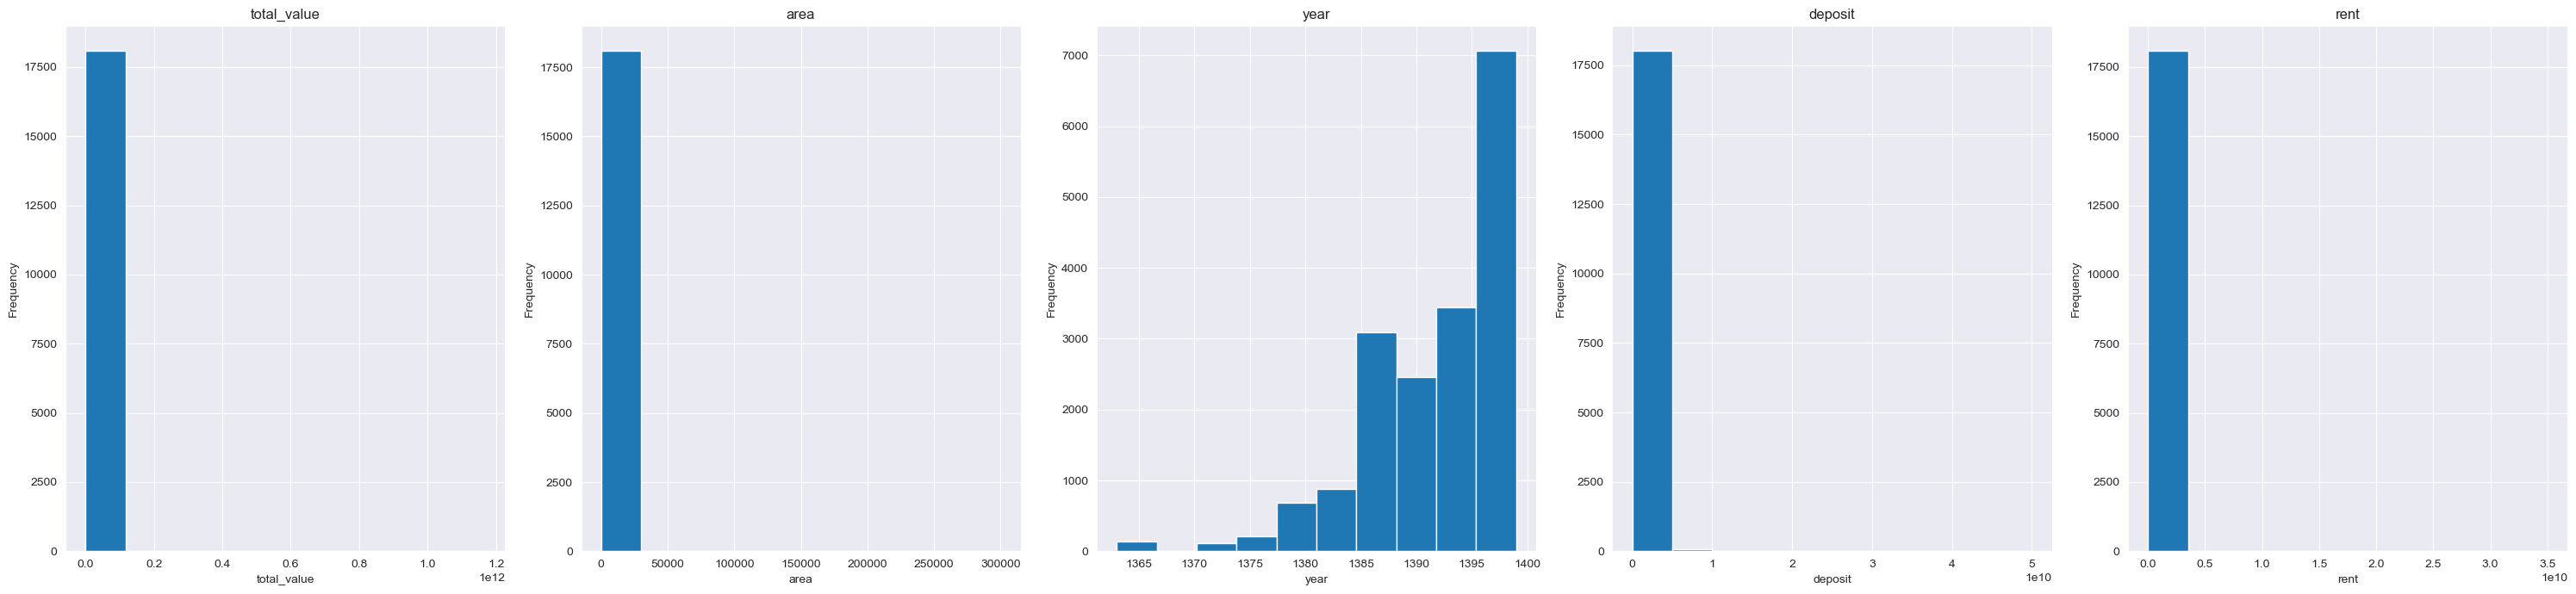

In [5]:
plot_columns = ['total_value' , 'area' , 'year' , 'deposit' , 'rent']

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(1, len(plot_columns), figsize=(30, 7))  # Adjust the figsize as needed

# Iterate through selected columns and create histograms
for i, column in enumerate(plot_columns):
    df[column].plot(kind='hist', ax=axes[i], title=column )
    axes[i].set_xlabel(column)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

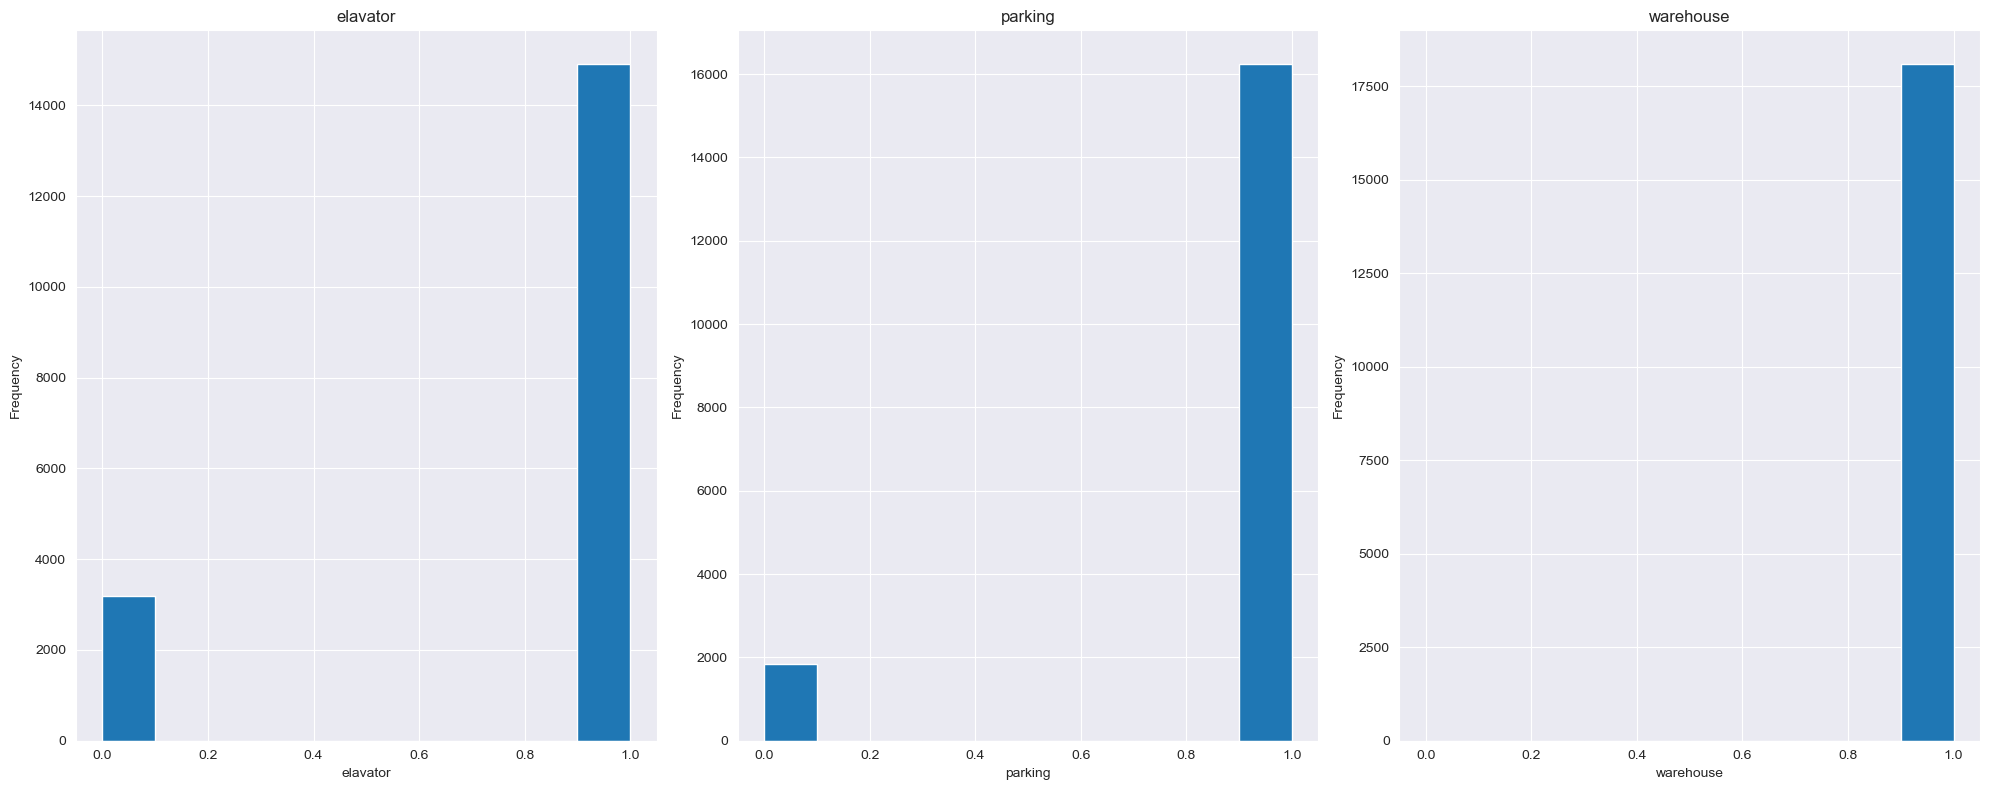

In [6]:
plot_columns = ['elavator' , 'parking' , 'warehouse']

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(1, len(plot_columns), figsize=(20, 8))  # Adjust the figsize as needed

# Iterate through selected columns and create histograms
for i, column in enumerate(plot_columns):
    df[column].plot(kind='hist', ax=axes[i], title=column )
    axes[i].set_xlabel(column)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [7]:
np.unique(df['warehouse'] , return_counts = True )

(array([0, 1], dtype=int64), array([    2, 18086], dtype=int64))

## Preprocessing for model

In [8]:
cat_col = ['elavator' , 'parking' , 'warehouse' , 'neighborhood']
cat_col_df = df[cat_col]
df1 = df.drop(columns = cat_col)
df1

,total_value,area,year,deposit,rent
0,3.000000e+09,270,1399,2.000000e+09,30000000.0
1,3.333333e+08,70,1387,2.000000e+08,4000000.0
2,6.333333e+08,120,1395,3.500000e+08,8500000.0
3,5.333333e+08,110,1395,2.000000e+08,10000000.0
4,4.000000e+08,80,1387,2.000000e+08,6000000.0
...,...,...,...,...,...
18083,8.000000e+08,100,1399,8.000000e+08,0.0
18084,3.000000e+08,90,1398,1.000000e+08,6000000.0
18085,1.516667e+09,165,1390,3.500000e+08,35000000.0
18086,4.000000e+09,300,1399,4.000000e+09,0.0


In [9]:
one_hot_encoded = pd.get_dummies(cat_col_df, columns=cat_col)
one_hot_encoded

,elavator_0,elavator_1,parking_0,parking_1,warehouse_0,warehouse_1,neighborhood_ آبشار,neighborhood_ آبشار تهران,neighborhood_ آجودانیه,neighborhood_ آذربایجان,...,neighborhood_ کوی مهران,neighborhood_ کوی نوبنیاد,neighborhood_ گاندی,neighborhood_ گرگان,neighborhood_ گلاب دره,neighborhood_ گمرک,neighborhood_ گیشا (کوی نصر),neighborhood_ یاخچی‌آباد,neighborhood_ یافت‌آباد,neighborhood_ یوسف‌آباد
0,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18083,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18084,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18085,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18086,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df2 = pd.concat([df1 , one_hot_encoded] , axis = 1)
df2

,total_value,area,year,deposit,rent,elavator_0,elavator_1,parking_0,parking_1,warehouse_0,...,neighborhood_ کوی مهران,neighborhood_ کوی نوبنیاد,neighborhood_ گاندی,neighborhood_ گرگان,neighborhood_ گلاب دره,neighborhood_ گمرک,neighborhood_ گیشا (کوی نصر),neighborhood_ یاخچی‌آباد,neighborhood_ یافت‌آباد,neighborhood_ یوسف‌آباد
0,3.000000e+09,270,1399,2.000000e+09,30000000.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.333333e+08,70,1387,2.000000e+08,4000000.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,6.333333e+08,120,1395,3.500000e+08,8500000.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5.333333e+08,110,1395,2.000000e+08,10000000.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4.000000e+08,80,1387,2.000000e+08,6000000.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18083,8.000000e+08,100,1399,8.000000e+08,0.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18084,3.000000e+08,90,1398,1.000000e+08,6000000.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18085,1.516667e+09,165,1390,3.500000e+08,35000000.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18086,4.000000e+09,300,1399,4.000000e+09,0.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Train Test Split

In [11]:
df3 = np.reshape(df2 , (len(df2), -1))
df3

,total_value,area,year,deposit,rent,elavator_0,elavator_1,parking_0,parking_1,warehouse_0,...,neighborhood_ کوی مهران,neighborhood_ کوی نوبنیاد,neighborhood_ گاندی,neighborhood_ گرگان,neighborhood_ گلاب دره,neighborhood_ گمرک,neighborhood_ گیشا (کوی نصر),neighborhood_ یاخچی‌آباد,neighborhood_ یافت‌آباد,neighborhood_ یوسف‌آباد
0,3.000000e+09,270.0,1399.0,2.000000e+09,30000000.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.333333e+08,70.0,1387.0,2.000000e+08,4000000.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.333333e+08,120.0,1395.0,3.500000e+08,8500000.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.333333e+08,110.0,1395.0,2.000000e+08,10000000.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.000000e+08,80.0,1387.0,2.000000e+08,6000000.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18083,8.000000e+08,100.0,1399.0,8.000000e+08,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18084,3.000000e+08,90.0,1398.0,1.000000e+08,6000000.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18085,1.516667e+09,165.0,1390.0,3.500000e+08,35000000.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18086,4.000000e+09,300.0,1399.0,4.000000e+09,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X = df3.drop(columns = ['total_value'])
y = df3['total_value']

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 2 )

## Modeling

In [14]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',n_estimators=2000, early_stopping_rounds=50, objective='reg:linear', max_depth=3, learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:15024738551.66901	validation_1-rmse:5773820220.88860
[100]	validation_0-rmse:7652887675.89156	validation_1-rmse:2323056660.24359
[200]	validation_0-rmse:4036932112.88968	validation_1-rmse:971724158.33315
[300]	validation_0-rmse:2295826857.71174	validation_1-rmse:578613983.35876
[400]	validation_0-rmse:1406468696.95084	validation_1-rmse:427944643.63966
[500]	validation_0-rmse:886729026.07988	validation_1-rmse:313844257.41679
[600]	validation_0-rmse:570843622.45843	validation_1-rmse:234262633.32522
[700]	validation_0-rmse:381001405.25074	validation_1-rmse:183693900.49565
[800]	validation_0-rmse:271168579.20727	validation_1-rmse:155026063.72989
[900]	validation_0-rmse:212082746.48508	validation_1-rmse:141929894.99494
[1000]	validation_0-rmse:178377779.61179	validation_1-rmse:134413553.80429
[1100]	validation_0-rmse:159086679.53037	validation_1-rmse:132022966.54366
[1200]	validation_0-rmse:148409765.99586	validation_1-rmse:130982134.37210
[1300]	validation_0-rmse:1398

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

## Validation

In [15]:
y_pre_te = reg.predict(X_test)
y_pre_tr = reg.predict(X_train)

In [16]:
print('R2 Score for Test data = ' , r2_score(y_test , y_pre_te))
print('R2 Score for Train data = ' , r2_score(y_train, y_pre_tr))

R2 Score for Test data =  0.9996542377755437
R2 Score for Train data =  0.999955549185889


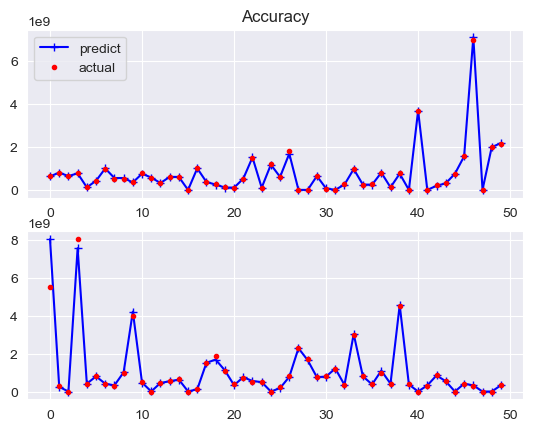

In [17]:
plt.subplot(211)
plt.plot(y_pre_tr[:50] , 'b-+')
plt.plot(y_train.values[:50] , 'r.')
plt.legend(['predict' , 'actual'])
plt.title('Accuracy')
plt.subplot(212)
plt.plot(y_pre_te[:50], 'b-+')
plt.plot(y_test.values[:50], 'r.')
plt.show()